In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv ("D:\PW live Assignment\election2024.csv")

In [3]:
df.head ()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [4]:
df.isnull().sum ()

id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight1                  0
dtype: int64

In [5]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [6]:
df.describe()

,age,weight1
count,1600.000000,1600.000000
mean,49.936250,1.000000
std,16.901797,0.327084
min,18.000000,0.468226
25%,37.000000,0.772224
50%,49.000000,0.921724
75%,64.000000,1.158913
max,90.000000,2.515072


In [9]:
df.dropna(subset=['job_type', 'company_type'], inplace=True)


In [10]:
df.isnull().sum ()

id                     0
sex                    0
age                    0
federal_district       0
type_of_city           0
knows_election_date    0
will_vote              0
candidate              0
television_usage       0
internet_usage         0
education              0
income                 0
employment             0
job_type               0
company_type           0
weight1                0
dtype: int64

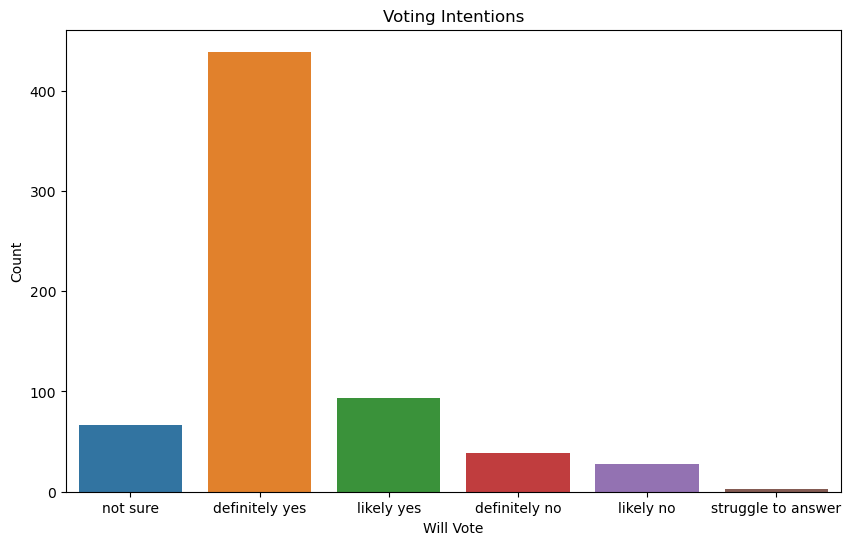

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='will_vote', data=df)
plt.title('Voting Intentions')
plt.xlabel('Will Vote')
plt.ylabel('Count')
plt.show()

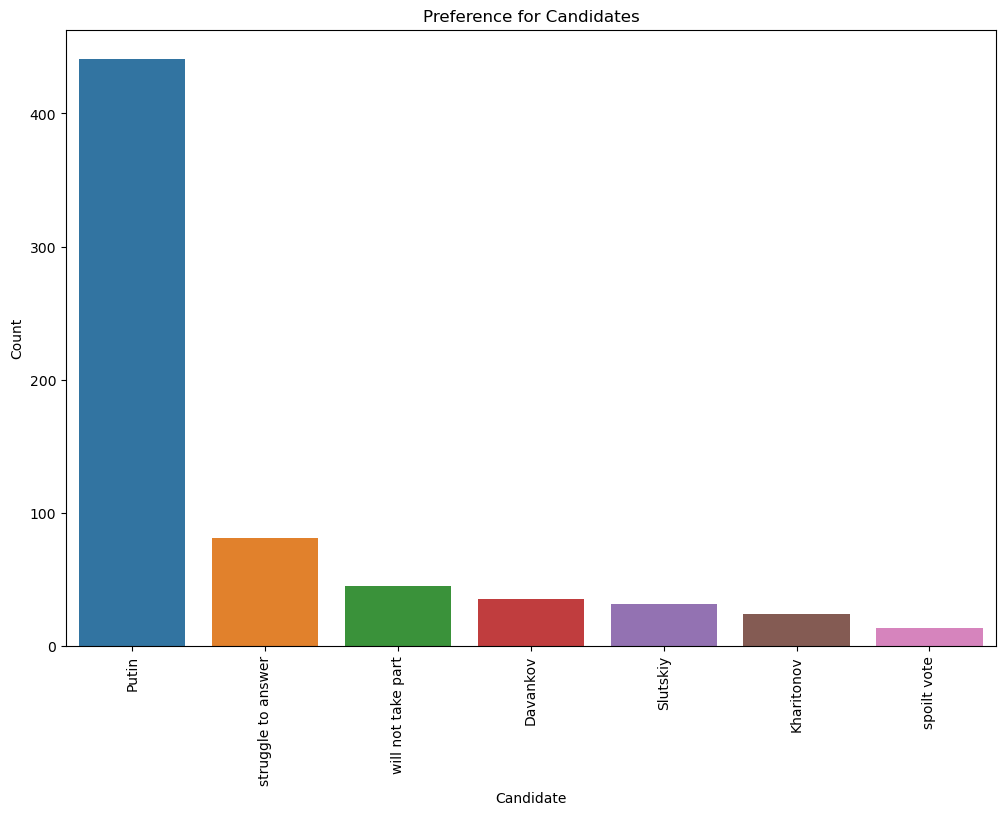

In [13]:

plt.figure(figsize=(12, 8))
sns.countplot(x='candidate', data=df, order=df['candidate'].value_counts().index)
plt.title('Preference for Candidates')
plt.xlabel('Candidate')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [16]:
df.describe ()

,age,weight1
count,670.000000,670.000000
mean,43.522388,1.043224
std,13.168856,0.348694
min,18.000000,0.468226
25%,35.000000,0.789821
50%,43.000000,0.973715
75%,53.000000,1.219750
max,77.000000,2.515072


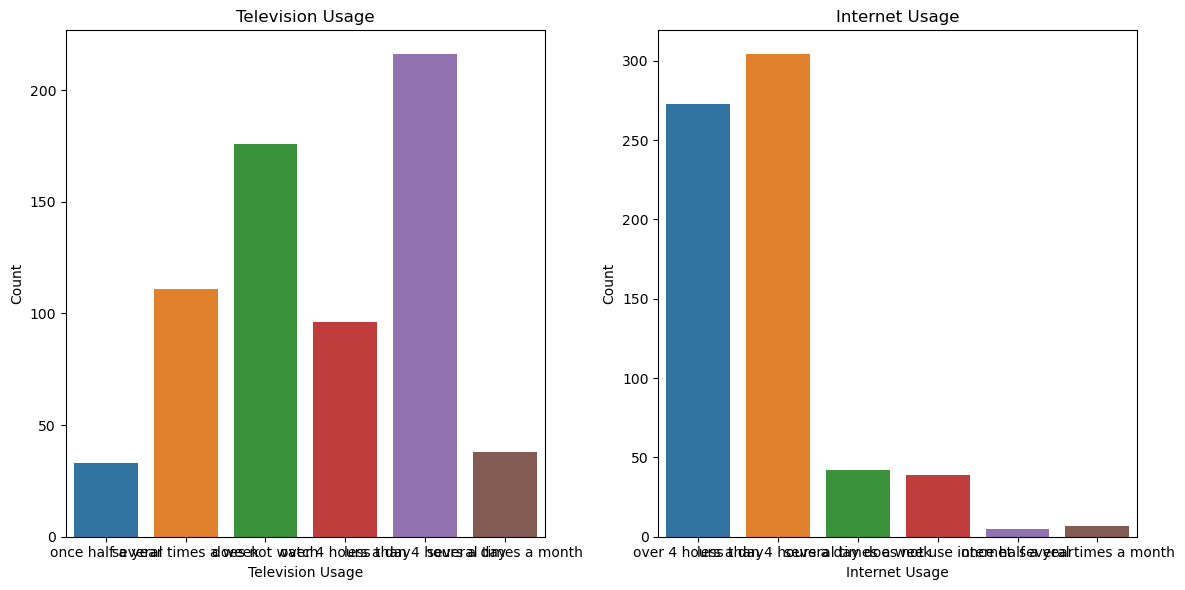

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='television_usage', data=df)
plt.title('Television Usage')
plt.xlabel('Television Usage')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='internet_usage', data=df)
plt.title('Internet Usage')
plt.xlabel('Internet Usage')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

C:\Users\btirk\AppData\Local\Temp\ipykernel_6388\2367924522.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


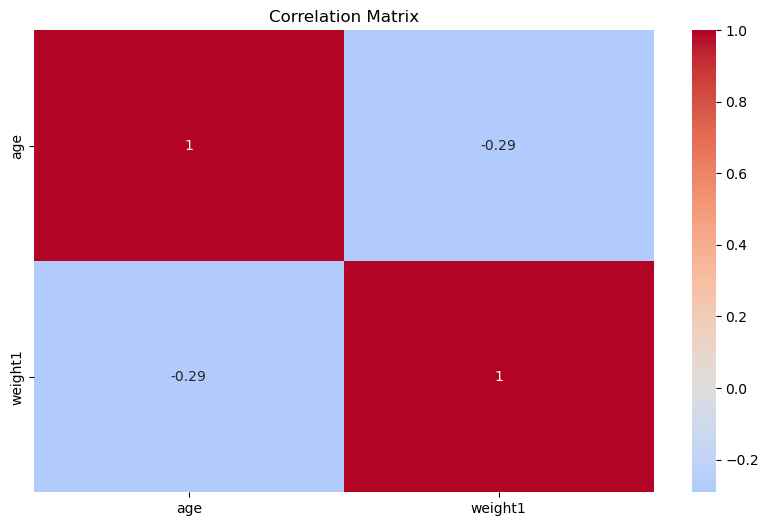

In [15]:
plt.figure(figsize=(10, 6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [17]:
age_by_district = df.groupby('federal_district')['age'].mean()
print(age_by_district)
#Siberian and Ural districts have the highest average ages 

federal_district
central            43.714286
far eastern        43.435897
north caucasian    43.848485
northwestern       44.044776
siberian           44.901235
southern           41.154762
ural               44.960784
volga              43.078571
Name: age, dtype: float64


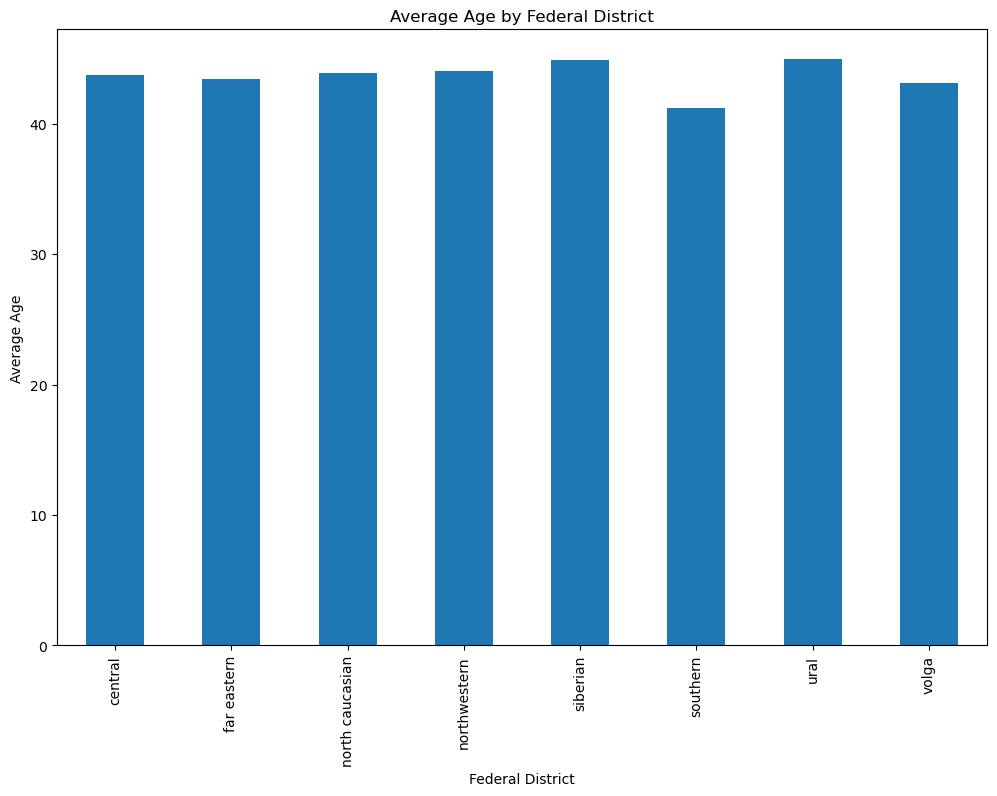

In [23]:

plt.figure(figsize=(12, 8))
age_by_district.plot(kind='bar')
plt.title('Average Age by Federal District')
plt.xlabel('Federal District')
plt.ylabel('Average Age')
plt.xticks(rotation=90)
plt.show()
